In [ ]:
import numpy as np
import os
import pandas as pd
from rasterio.plot import show
import rasterio as rio
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from skimage.segmentation import quickshift
import skimage.data as data
import skimage.segmentation as seg
from skimage import filters
from skimage import draw
from skimage import color
from skimage import exposure
#own function
from functions_ccdc import *
import time as time 
import scipy as sp
from IPython.display import display

#need for gaussian process example at least
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, ExpSineSquared, ConstantKernel
from sklearn.neighbors import LocalOutlierFactor

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.interpolate import interp1d

In [2]:
har1=pd.read_csv('northe_point_ccdc_down_nout4_har3_v1.csv')


In [3]:
xydata=np.array((har1.loc[:,['x','y']].T))
print(xydata.shape)

(2, 8024)


In [4]:
print("Columns in har1 fit data:", har1.columns.tolist())

Columns in har1 fit data: ['Unnamed: 0', 'x', 'y', 'normal_t_0', 'normal_t_1', 'normal_t_2', 'normal_t_3', 'normal_t_4', 'normal_t_5', 'normal_t_6', 'normal_t_7', 'normal_t_8', 'normal_t_9', 'normal_t_10', 'normal_t_11', 'normal_t_12', 'normal_t_13', 'normal_t_14', 'normal_t_15', 'normal_t_16', 'normal_t_17', 'normal_t_18', 'normal_t_19', 'normal_t_20', 'normal_t_21', 'normal_t_22', 'normal_t_23', 'normal_t_24', 'normal_t_25', 'normal_t_26', 'normal_t_27', 'normal_t_28', 'normal_t_29', 'normal_t_30', 'normal_t_31', 'normal_t_32', 'normal_t_33', 'normal_t_34', 'normal_t_35', 'normal_t_36', 'normal_t_37', 'normal_t_38', 'normal_t_39', 'normal_t_40', 'normal_t_41', 'normal_t_42', 'normal_t_43', 'normal_t_44', 'normal_t_45', 'normal_t_46', 'normal_t_47', 'normal_t_48', 'normal_t_49', 'normal_t_50', 'normal_t_51', 'normal_t_52', 'normal_t_53', 'normal_t_54', 'normal_t_55', 'normal_t_56', 'normal_t_57', 'normal_t_58', 'normal_t_59', 'normal_t_60', 'normal_t_61', 'normal_t_62', 'normal_t_63',

Displaying some fit parameters. 

In [5]:
xydata.shape

(2, 8024)

In [6]:
print(har1.fitpar_2_ch_4_segm_0)

0        7.305392
1      -34.520021
2      -55.010159
3        1.566800
4      -40.971976
          ...    
8019    16.170865
8020    11.237035
8021    28.082768
8022    -3.694370
8023    11.216831
Name: fitpar_2_ch_4_segm_0, Length: 8024, dtype: float64


random element 2287 has outlier classification 1


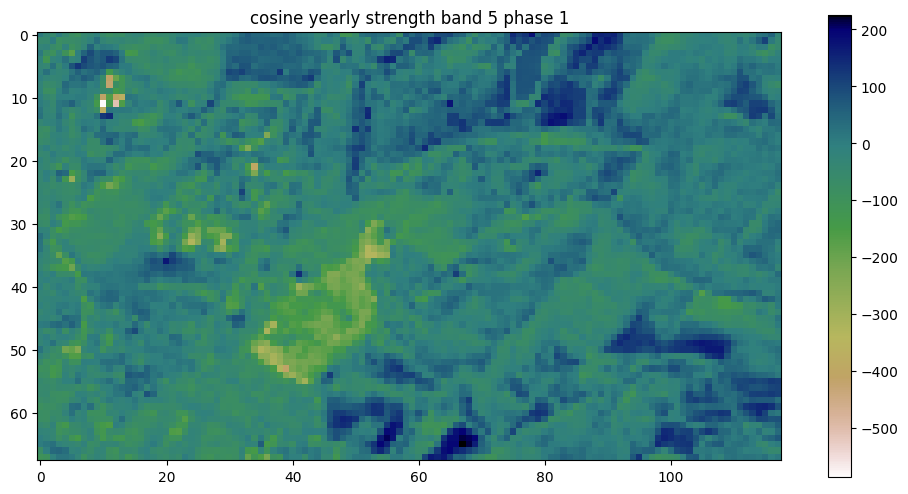

In [7]:
examples=[[45,19]]
list_type=['random']
list_ex=coords_el(examples,xydata)
vis_outlier_regular(np.array(har1.fitpar_2_ch_4_segm_0),xydata,direct=True,list_type=list_type,list_ex=list_ex,add_title='cosine yearly strength band 5 phase 1')

random element 2287 has outlier classification 97


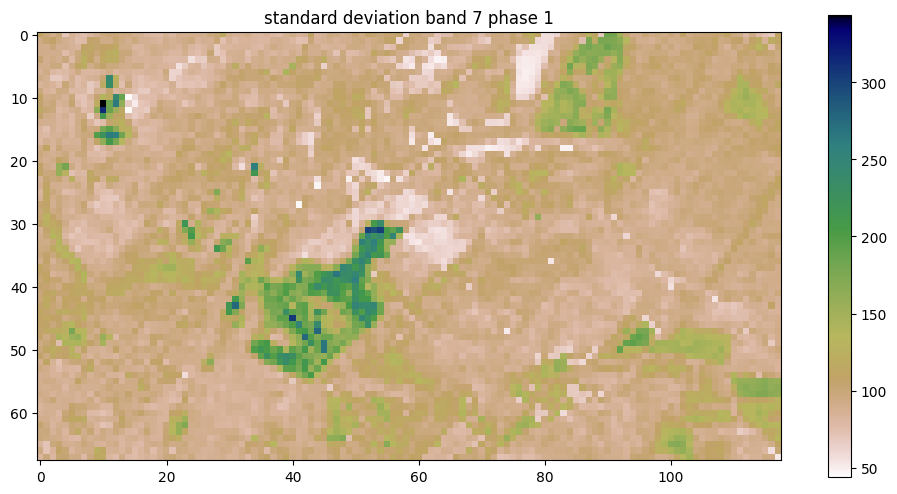

In [8]:
vis_outlier_regular(np.array(har1.std_ch_7_segm_0),xydata,direct=True,list_type=list_type,list_ex=list_ex,add_title='standard deviation band 7 phase 1')

random element 2287 has outlier classification 1


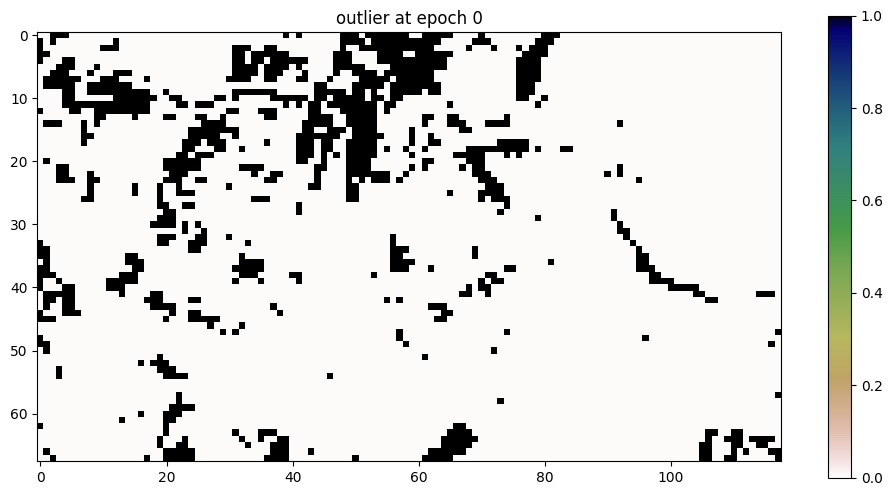

In [9]:
vis_outlier_regular(np.array(har1.normal_t_0),xydata,direct=True,list_type=list_type,list_ex=list_ex,add_title='outlier at epoch 0')

Many pixels bad in first epoch. 

random element 2287 has outlier classification 2025


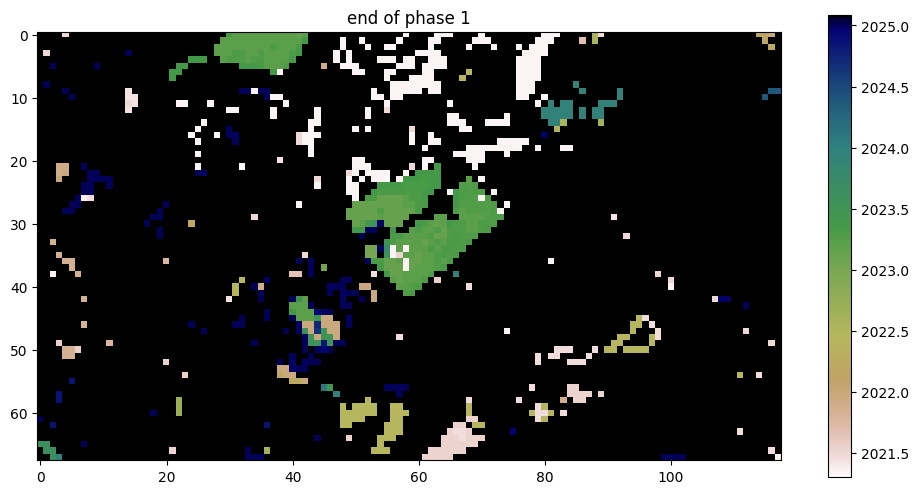

In [10]:
#rounding for elements print not ideal. 
vis_outlier_regular(np.array(har1.end_segm_0),xydata,direct=True,list_type=list_type,list_ex=list_ex,add_title='end of phase 1')

End of first phase, when not at the end there is an anomaly. Most known. Still some outside the known areas, and many dates there are close to the end and beginning which were known problemagtic perirod. Now no clear connection to use of first epoch. 

random element 2287 has outlier classification 0


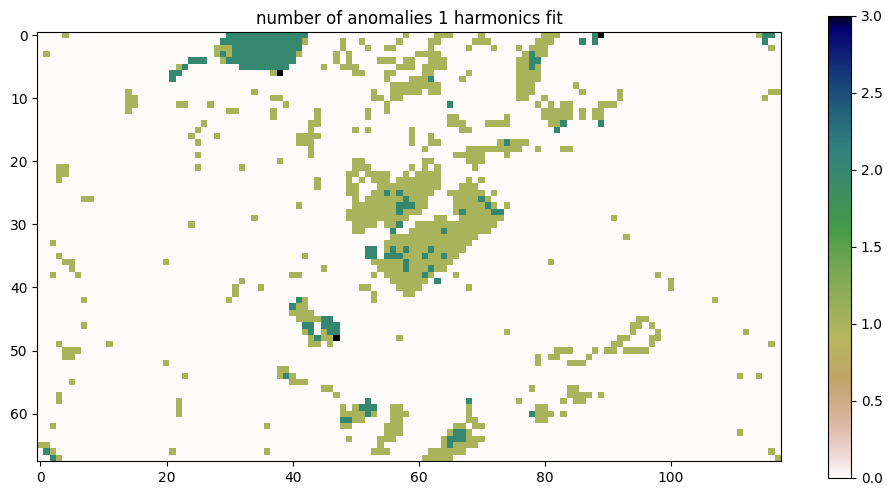

In [11]:
vis_outlier_regular(np.array(har1.n_anomalies),xydata,direct=True,list_type=list_type,list_ex=list_ex,add_title='number of anomalies 1 harmonics fit')

Mostly 1, the few exceptions are all in the known anomalous areas. 
 
3 harmonic fit now, result is not from the same version of ccdc, it still ignores the first element in time and other updates.  

In [12]:
har3=pd.read_csv('armazones_ccdc_down_nout4_har3_v1.csv')

======================================================

In [13]:
list_int=['devon_armazones_labels_v1.csv','devon_northe_point_labels_v1.csv','devon_foresthill_labels.csv',
        'jonathan_armazones_labels_v1.csv','jonathan_northe_point_labels_v1.csv','jonathan_forest_labels_v1.csv',
        'zach_armazones_labelsV1.csv','zach_northepoint_labelsV1.csv','zach_forest_labelsV1.csv',
        'kiana_northe_point_labels.csv','kiana_foresthill_labels.csv','kiana_armazones_labels.csv',
        'tobias_armazones_labels.csv','tobias_foresthill_labels.csv','tobias_northepoint_labels.csv']

In [14]:
for i in range(len(list_int)):
    print(list_int[i])
    a=pd.read_csv(list_int[i])
    print(a.status.value_counts())

devon_armazones_labels_v1.csv
status
Not_anomalous    84
Anomalous        16
Name: count, dtype: int64
devon_northe_point_labels_v1.csv
status
Not_anomalous    82
Anomalous        17
Uncertain         1
Name: count, dtype: int64
devon_foresthill_labels.csv
status
Anomalous        74
Not_anomalous    23
Uncertain         3
Name: count, dtype: int64
jonathan_armazones_labels_v1.csv
status
Not_anomalous    85
Anomalous        15
Uncertain         1
Name: count, dtype: int64
jonathan_northe_point_labels_v1.csv
status
Not_anomalous    57
Anomalous        43
Name: count, dtype: int64
jonathan_forest_labels_v1.csv
status
Anomalous        84
Not_anomalous    16
Name: count, dtype: int64
zach_armazones_labelsV1.csv
status
Not_anomalous    73
Anomalous        28
Name: count, dtype: int64
zach_northepoint_labelsV1.csv
status
Not_anomalous    80
Anomalous        21
Name: count, dtype: int64
zach_forest_labelsV1.csv
status
Anomalous        81
Not_anomalous    19
Uncertain         1
Name: count, dty

In [15]:
def make_anomalies_plot(file_name):
    a=pd.read_csv(file_name)
    a['anomalosity']=np.where(a.status=='Anomalous', 1,np.where(a.status=='Not_anomalous',0,0.5))
    an=file_name.split('_')
    target=None
    if an[1]=='armazones':
        target='armazones'
    elif an[1]=='forest':
        target='forest_hills'      
    elif an[1]=='foresthill':
        target='forest_hills'          
    elif an[1]=='northepoint':
        target='northe_point' 
    elif an[1]=='northe':
        target='northe_point'           
    if target=='armazones':
        dat=pd.read_csv('armazones_resampled_v1.csv.gz')
        xm= int(dat.x.max() + 1)
        ym= int(dat.y.max() + 1)
        dat=0        
    elif target=='forest_hills':    
        dat=pd.read_csv('foresthill_v1.csv.gz')
        xm= int(dat.x.max() + 1)
        ym= int(dat.y.max() + 1)
        dat=0
    elif target=='northe_point':    
        dat=pd.read_csv('northe_point_resampled_v1.csv.gz')
        xm= int(dat.x.max() + 1)
        ym= int(dat.y.max() + 1)
        dat=0    
    anoms_in_ar=np.ones((xm,ym))*0.5
    for i in range(a.shape[0]):
        anoms_in_ar[int(a.x.iloc[i]),int(a.y.iloc[i])]=a.anomalosity.iloc[i]
    plt.title(f"{an[0]} {target}")
    plt.imshow(anoms_in_ar)
    plt.colorbar(label="anomalosity", orientation="horizontal",aspect=60,pad=0.14)    

In [16]:
list_visual_a=['devon_armazones_labels_v1.csv',
        'jonathan_armazones_labels_v1.csv',
        'zach_armazones_labelsV1.csv',
        'kiana_armazones_labels.csv',
        'tobias_armazones_labels.csv']
list_visual_np=['devon_northe_point_labels_v1.csv','jonathan_northe_point_labels_v1.csv','zach_northepoint_labelsV1.csv',
        'kiana_northe_point_labels.csv','tobias_northepoint_labels.csv']
list_visual_fh=['devon_foresthill_labels.csv','jonathan_forest_labels_v1.csv','zach_forest_labelsV1.csv',
        'kiana_foresthill_labels.csv','tobias_foresthill_labels.csv']


In [17]:
# CCDC files for Armazones
list_ccdc_a = [
    'armazones_ccdc_down_nout4_har1_v1.csv',
    'armazones_ccdc_down_nout4_har2_v1.csv',
    'armazones_ccdc_down_nout4_har3_v1.csv'
]

# CCDC files for Northe Point
list_ccdc_np = [
    'northe_point_ccdc_down_nout4_har1_v1.csv',
    'northe_point_ccdc_down_nout4_har2_v1.csv',
    'northe_point_ccdc_down_nout4_har3_v1.csv'
]

# CCDC files for Foresthill
list_ccdc_fh = [
    'foresthills_ccdc_down_nout4_har1_v1.csv',
    'foresthills_ccdc_down_nout4_har2_v1.csv',
    'foresthills_ccdc_down_nout4_har3_v1.csv'
]

In [18]:
# Compare with visually inspected indices

In [22]:
def compare_paired_labels(ccdc_files, visual_files):
    comparison_results = []
    
    for ccdc_file, visual_file in zip(ccdc_files, visual_files):
        # Load the files into DataFrames
        ccdc_df = pd.read_csv(ccdc_file)
        visual_df = pd.read_csv(visual_file)

        # Drop any unnecessary columns (like 'Unnamed: 0' if present)
        ccdc_df = ccdc_df.loc[:, ~ccdc_df.columns.str.contains('^Unnamed')]
        visual_df = visual_df.loc[:, ~visual_df.columns.str.contains('^Unnamed')]
        
        # Merge on coordinates (x, y) — Ensure consistent column names
        merged = pd.merge(ccdc_df, visual_df, on=["x", "y"], how="inner", suffixes=('_ccdc', '_visual'))
        
        # Filter out uncertain or unclassified values if needed
        merged = merged[merged['status'].isin(['Anomalous', 'Not_anomalous'])]

        # Binary classification: 'Anomalous' = 1, 'Not_anomalous' = 0
        visual_predictions = merged['status'].apply(lambda x: 1 if x == 'Anomalous' else 0)
        ccdc_predictions = merged['n_anomalies'].apply(lambda x: 1 if x > 0 else 0)

        # Calculate evaluation metrics
        accuracy = accuracy_score(visual_predictions, ccdc_predictions)
        precision = precision_score(visual_predictions, ccdc_predictions)
        recall = recall_score(visual_predictions, ccdc_predictions)
        f1 = f1_score(visual_predictions, ccdc_predictions)

        # Append results
        comparison_results.append((accuracy, precision, recall, f1))
    
    # Return as a DataFrame for easier display
    return pd.DataFrame(comparison_results, columns=["Accuracy", "Precision", "Recall", "F1"])

# Run comparison using aligned pairs
results_df_a = compare_paired_labels(list_ccdc_a, list_visual_a)
results_df_np = compare_paired_labels(list_ccdc_np, list_visual_np)
results_df_fh = compare_paired_labels(list_ccdc_fh, list_visual_fh)

# display results
print("Comparison Results for Armazones:")
display(results_df_a)

print("Comparison Results for Northe Point:")
display(results_df_np)

print("Comparison Results for Foresthills:")
display(results_df_fh)

Comparison Results for Armazones:


,Accuracy,Precision,Recall,F1
0,0.870000,0.800000,0.250000,0.380952
1,0.860000,0.666667,0.133333,0.222222
2,0.772277,1.000000,0.178571,0.303030


Comparison Results for Northe Point:


,Accuracy,Precision,Recall,F1
0,0.89899,1.000000,0.411765,0.583333
1,0.61000,0.833333,0.116279,0.204082
2,0.80198,0.538462,0.333333,0.411765


Comparison Results for Foresthills:


,Accuracy,Precision,Recall,F1
0,0.494845,0.962963,0.351351,0.514851
1,0.510000,1.000000,0.416667,0.588235
2,0.480000,0.939394,0.382716,0.543860


# Visualize comparison results

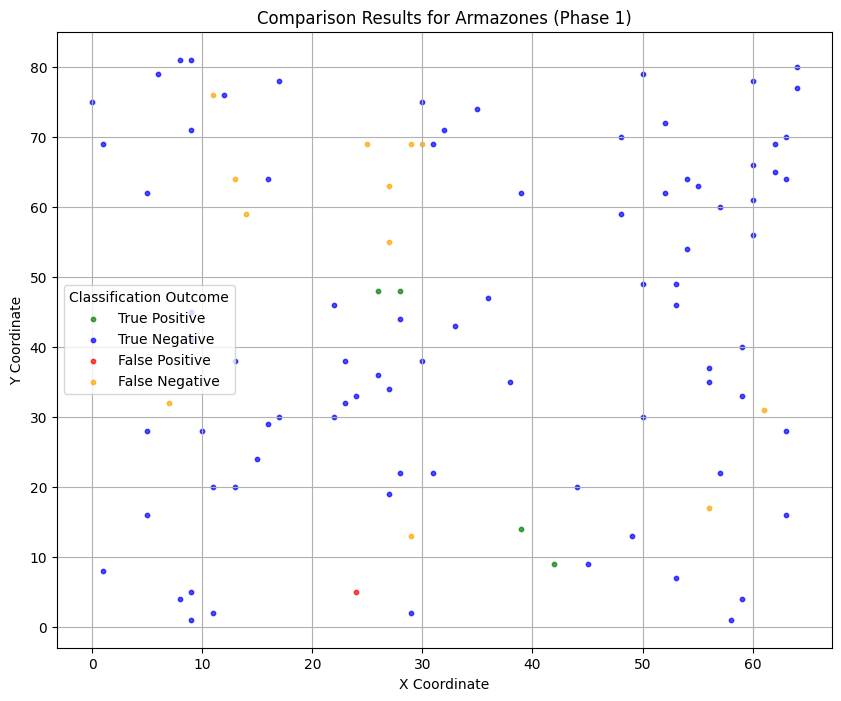

In [25]:
def plot_comparison(ccdc_df, visual_df, title):
    # Merge the datasets on (x, y) coordinates
    merged = pd.merge(ccdc_df, visual_df, on=["x", "y"], how="inner", suffixes=('_ccdc', '_visual'))
    
    # Filter out uncertain labels if needed
    merged = merged[merged['status'].isin(['Anomalous', 'Not_anomalous'])]

    # Define binary classification
    visual_predictions = merged['status'].apply(lambda x: 1 if x == 'Anomalous' else 0)
    ccdc_predictions = merged['n_anomalies'].apply(lambda x: 1 if x > 0 else 0)
    
    # Create classification outcomes
    merged['result'] = np.where(
        (visual_predictions == 1) & (ccdc_predictions == 1), 'True Positive',  # True Positive
        np.where(
            (visual_predictions == 0) & (ccdc_predictions == 0), 'True Negative',  # True Negative
            np.where(
                (visual_predictions == 0) & (ccdc_predictions == 1), 'False Positive',  # False Positive
                'False Negative'  # False Negative
            )
        )
    )

    # Define color mapping
    color_map = {
        'True Positive': 'green',  
        'True Negative': 'blue',  
        'False Positive': 'red',  
        'False Negative': 'orange'   
    }

    # Create plot
    plt.figure(figsize=(10, 8))
    
    for outcome, color in color_map.items():
        subset = merged[merged['result'] == outcome]
        plt.scatter(subset['x'], subset['y'], color=color, label=outcome, s=10, alpha=0.7)
    
    # Add labels and title
    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend(title="Classification Outcome")
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Example usage:
plot_comparison(
    pd.read_csv(list_ccdc_a[0]), 
    pd.read_csv(list_visual_a[0]), 
    title='Comparison Results for Armazones (Phase 1)'
)